<a href="https://colab.research.google.com/github/denvercodernine/intro_nlp_article_classification/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

In [46]:
import matplotlib.pyplot as plt
import requests
import io
import re

Github access

In [47]:
#@title
token = r'8d445abf04e14781787ab7c87c9135ecd6c3e56d'
username = 'denvercodernine'
github_session = requests.Session()
github_session.auth = (username, token)
    
# Downloading the csv file from your GitHub

url_data = "https://raw.githubusercontent.com/denvercodernine/intro_nlp_article_classification/main/scraper/newdata.csv"
url_catid = 'https://raw.githubusercontent.com/denvercodernine/intro_nlp_article_classification/main/scraper/categories.csv'
# Make sure the url is the raw version of the file on GitHub
download_data = github_session.get(url_data).content
download_cat = github_session.get(url_catid).content



**Loading raw data**

In [48]:
import pandas as pd

df = pd.read_csv(io.StringIO(download_data.decode('utf-8')))
cat = pd.read_csv(io.StringIO(download_cat.decode('utf-8')))

In [49]:
df = df[df.catidbase.isin(cat.cat_id)]
df.head()

,catid,catidbase,catidlist,content,description,postid,tags,title,url,writtenOn
0,1001005,1001005,"1000000,1001005",Trung tâm Dự báo Khí tượng Thủy văn quốc gia ...,Tin bão xa một cơn bão khác tên quốc tế Atsa...,4188067,NaN,Bão mạnh cấp 10 gần Biển Đông,https://vnexpress.net/bao-manh-cap-10-gan-bien...,"Thứ sáu, 6/11/2020, 18:22 (GMT+7)"
1,1001142,1001002,"1000000,1001002,1001142",Các nỗ lực hòa giải sau bầu cử tổng thống Mỹ ...,Trump có thể theo đuổi cuộc chiến pháp lý hoặc...,4189943,NaN,Những kịch bản có thể xảy ra khi Trump không n...,https://vnexpress.net/nhung-kich-ban-co-the-xa...,"Thứ tư, 11/11/2020, 20:00 (GMT+7)"
2,1001002,1001002,"1000000,1001002",Trang ngày 10/11 dẫn một nguồn tin giấu tên t...,Trump có thể nhận được những lời chào mời về h...,4190431,NaN,Trump có thể kiếm 100 triệu USD hậu Nhà Trắng ...,https://vnexpress.net/trump-co-the-kiem-100-tr...,"Thứ tư, 11/11/2020, 20:36 (GMT+7)"
3,1001139,1001002,"1000000,1001002,1001139",Truyền thông Mỹ hôm 7/11 xướng tên ứng viên đả...,Trump đang thúc đẩy các thách thức pháp lý nhằ...,4190259,NaN,5 mặt trận pháp lý bầu cử Trump khởi xướng - V...,https://vnexpress.net/5-mat-tran-phap-ly-bau-c...,"Thứ tư, 11/11/2020, 21:00 (GMT+7)"
4,1001005,1001005,"1000000,1001005",Ngày 5/11 Hội nghị Tư lệnh Hải quân các nước ...,Sáng kiến quot cơ chế hợp tác trao đổi kinh ...,4187610,NaN,Tư lệnh Hải quân ASEAN trao đổi kinh nghiệm hu...,https://vnexpress.net/tu-lenh-hai-quan-asean-t...,"Thứ năm, 5/11/2020, 22:24 (GMT+7)"


In [50]:
df.count()

catid          1418
catidbase      1418
catidlist      1418
content        1418
description    1418
postid         1418
tags              0
title          1418
url            1418
writtenOn      1418
dtype: int64

In [51]:
df.dtypes

catid            int64
catidbase        int64
catidlist       object
content         object
description     object
postid           int64
tags           float64
title           object
url             object
writtenOn       object
dtype: object

In [52]:
punctuation = [r'!',  r'&', r'-', r'\/', r'\\',
               r'(', r')', r'*', r'+', r',', u':', u';', u'=', u'>', u'?', u'.']

def clean_text(text):
  for punc in punctuation:
    text = text.replace(punc, ' ')
  text = text.replace('VnExpress', '')
  text = re.sub(r'[0-9]+', '', text)
  return text

df['text'] = df.title + " " + df.description + " " + df.content
df['text'] = df['text'].apply(clean_text)

In [53]:
df['len_text'] = df.text.apply(lambda i: len(i))

In [54]:
df['len_text'].describe()

count     1418.000000
mean      2655.394217
std       1775.483892
min        271.000000
25%       1503.500000
50%       2136.000000
75%       3347.750000
max      12201.000000
Name: len_text, dtype: float64

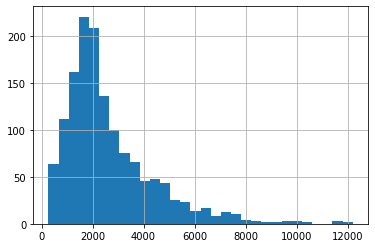

In [55]:
df.len_text.hist(bins=30)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
countVec = CountVectorizer(max_features= 5000, min_df=.01, max_df=.90)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(df.text, df.catidbase, test_size=0.2, random_state=42)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)

#useful debug, get an idea of the item list you generated
list(countVec.vocabulary_.items())

train_vocab = count_vect.get_feature_names()

#training the Naive Bayes classifier

clf = MultinomialNB().fit(x_train_counts, y_train)

NameError: ignored

In [58]:
#make array from number of occurrences
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

In [59]:
#make a new data frame with columns term and occurrences, meaning word and number of occurences
bowListFrame = pd.DataFrame({'term': countVec.get_feature_names(), 'occurrences': occ})
print(bowListFrame)

          term  occurrences
0           ai          348
1     airlines           66
2         alex           25
3           am           22
4           an         1045
...        ...          ...
2060        ổn          200
2061       ủng          298
2062        ủy          139
2063        ức           23
2064       ứng          758

[2065 rows x 2 columns]


In [ ]:
#sort in order of number of word occurences, most->least. if you leave of ascending flag should default ASC
bowListFrame.sort_values(by='occurrences', ascending=False).head(60)